In [55]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [56]:
solvers = ['mgpcg', 'ml']
benchmarks = [
    (
        '16x16', {
            'lid_driven_cavity_2d': [
                'mgpcg',
                'ml'
            ]
        }
    ),
    (
        '32x32', {
            'lid_driven_cavity_2d': [
                'mgpcg',
                'ml'
            ]
        }
    ),
    (
        '64x64', {
            'lid_driven_cavity_2d': [
                'mgpcg',
                'ml'
            ]
        }
    )
]
REs = [100, 400, 1000]
legend_labels_sorted = ['mgpcg', 'ml']
colors = ['#1f77b4', '#ff7f0e']
solvers_colors = {
    'mgpcg': colors[0],
    'ml': colors[1]
}
ax_xticks = ['100', '400', '1000']
ax_yticks = ['16', '32', '64']

In [57]:
# Ghia et al. (1982) - Re = 100
reference_ux_RE_100 = {
    128: 1.00000,
    125: 0.84123,
    124: 0.78871,
    123: 0.73722,
    122: 0.68717,
    109: 0.23151,
    94: 0.00332,
    79: -0.13641,
    64: -0.20581,
    58: -0.21090,
    36: -0.15662,
    22: -0.10150,
    13: -0.06434,
    9: -0.04775,
    8: -0.04192,
    7: -0.03717,
    0: 0.00000
}

# Ghia et al. (1982) - Re = 100
reference_uy_RE_100 = {
    128: 0.00000,
    124: -0.05906,
    123: -0.07391,
    122: -0.08864,
    121: -0.10313,
    116: -0.16914,
    110: -0.22445,
    103: -0.24533,
    64: 0.05454,
    30: 0.17527,
    29: 0.17507,
    20: 0.16077,
    12: 0.12317,
    10: 0.10890,
    9: 0.10091,
    8: 0.09233,
    0: 0.00000
}

# Ghia et al. (1982) - Re = 400
reference_ux_RE_400 = {
    128: 1.00000,
    125: 0.75837,
    124: 0.68439,
    123: 0.61756,
    122: 0.55892,
    109: 0.29093,
    94: 0.16256,
    79: 0.02135,
    64: -0.11477,
    58: -0.17119,
    36: -0.32726,
    22: -0.24299,
    13: -0.14612,
    9: -0.10338,
    8: -0.09266,
    7: -0.08186,
    0: 0.00000
}

# Ghia et al. (1982) - Re = 400
reference_uy_RE_400 = {
    128: 0.00000,
    124: -0.12146,
    123: -0.15663,
    122: -0.19254,
    121: -0.22847,
    116: -0.23827,
    110: -0.44993,
    103: -0.38598,
    64: 0.05186,
    30: 0.30174,
    29: 0.30203,
    20: 0.28124,
    12: 0.22965,
    10: 0.20920,
    9: 0.19713,
    8: 0.18360,
    0: 0.00000
}

# Ghia et al. (1982) - Re = 1000
reference_ux_RE_1000 = {
    128: 1.00000,
    125: 0.65928,
    124: 0.57492,
    123: 0.51117,
    122: 0.46604,
    109: 0.33304,
    94: 0.18719,
    79: 0.05702,
    64: -0.06080,
    58: -0.10648,
    36: -0.27805,
    22: -0.38289,
    13: -0.29730,
    9: -0.22220,
    8: -0.20196,
    7: -0.18109,
    0: 0.00000
}

# Ghia et al. (1982) - Re = 1000
reference_uy_RE_1000 = {
    128: 0.00000,
    124: -0.21388,
    123: -0.27669,
    122: -0.33714,
    121: -0.39188,
    116: -0.51550,
    110: -0.42665,
    103: -0.31966,
    64: 0.02526,
    30: 0.32235,
    29: 0.33075,
    20: 0.37095,
    12: 0.32627,
    10: 0.30353,
    9: 0.29012,
    8: 0.27485,
    0: 0.00000
}


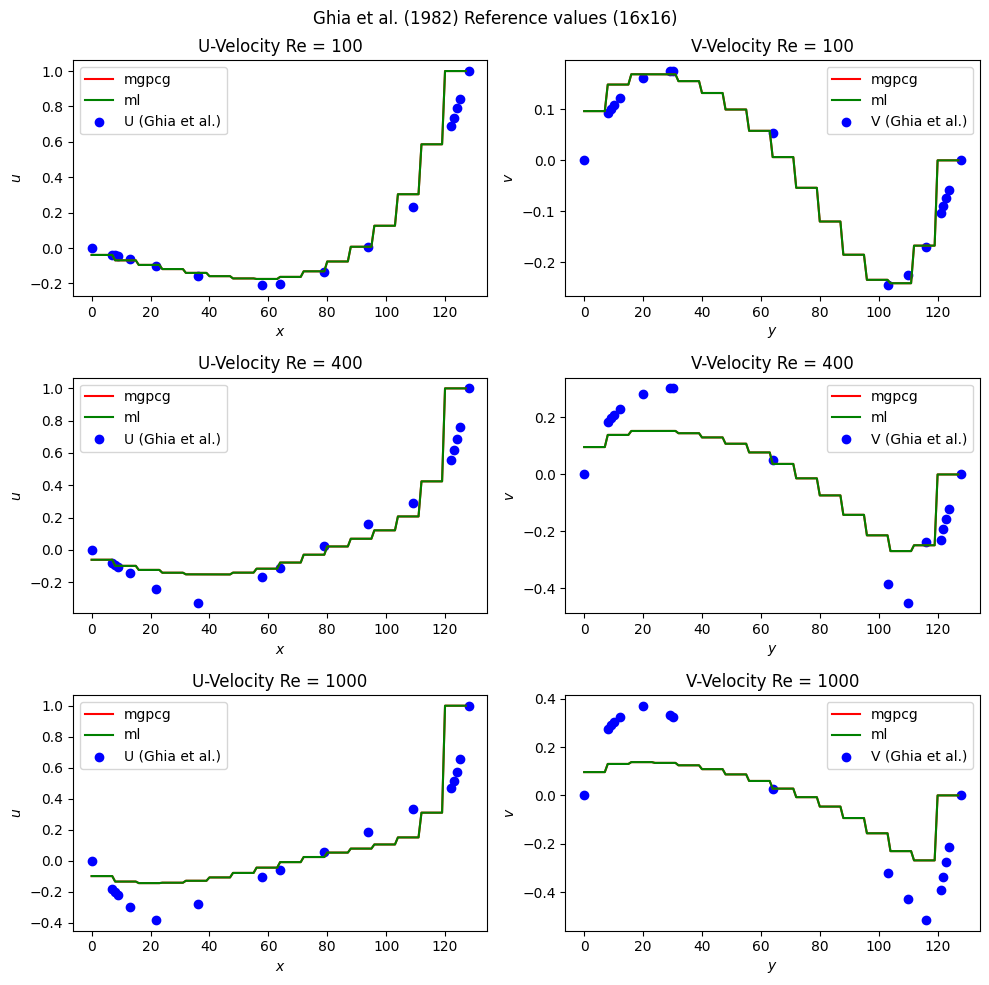

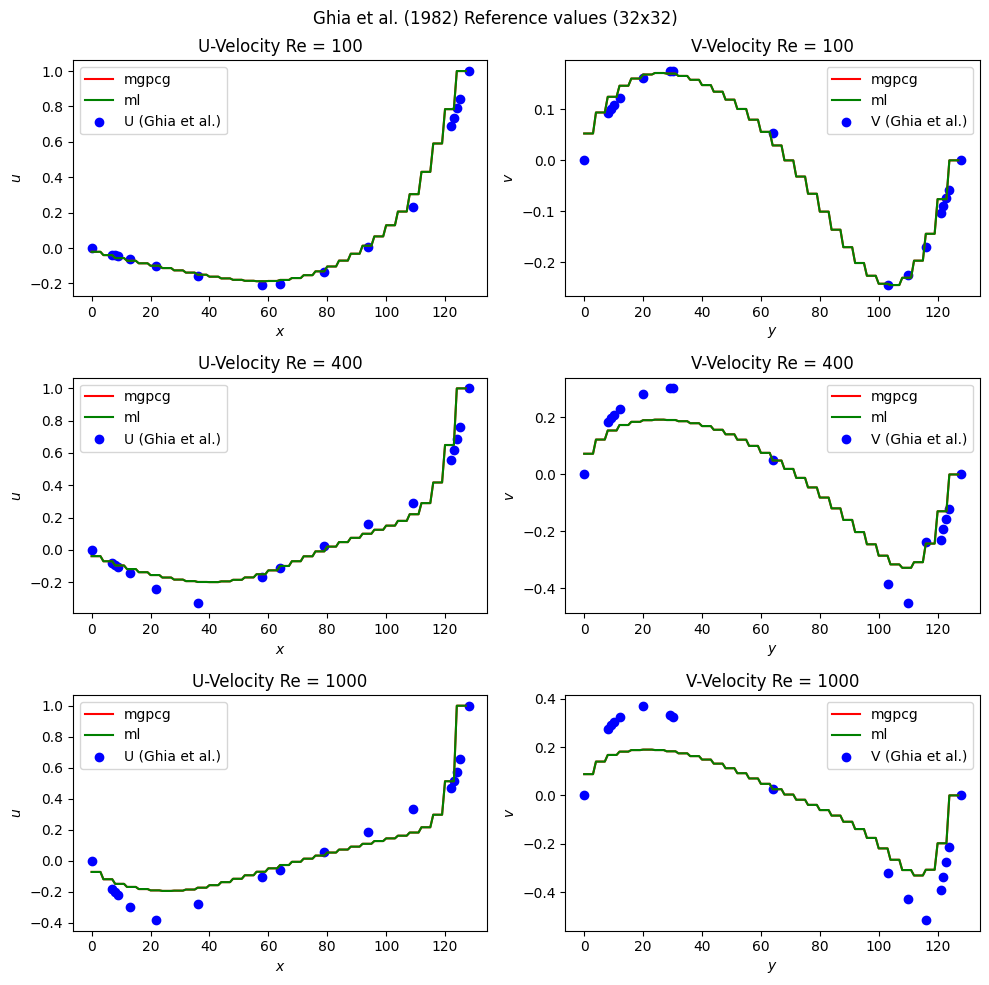

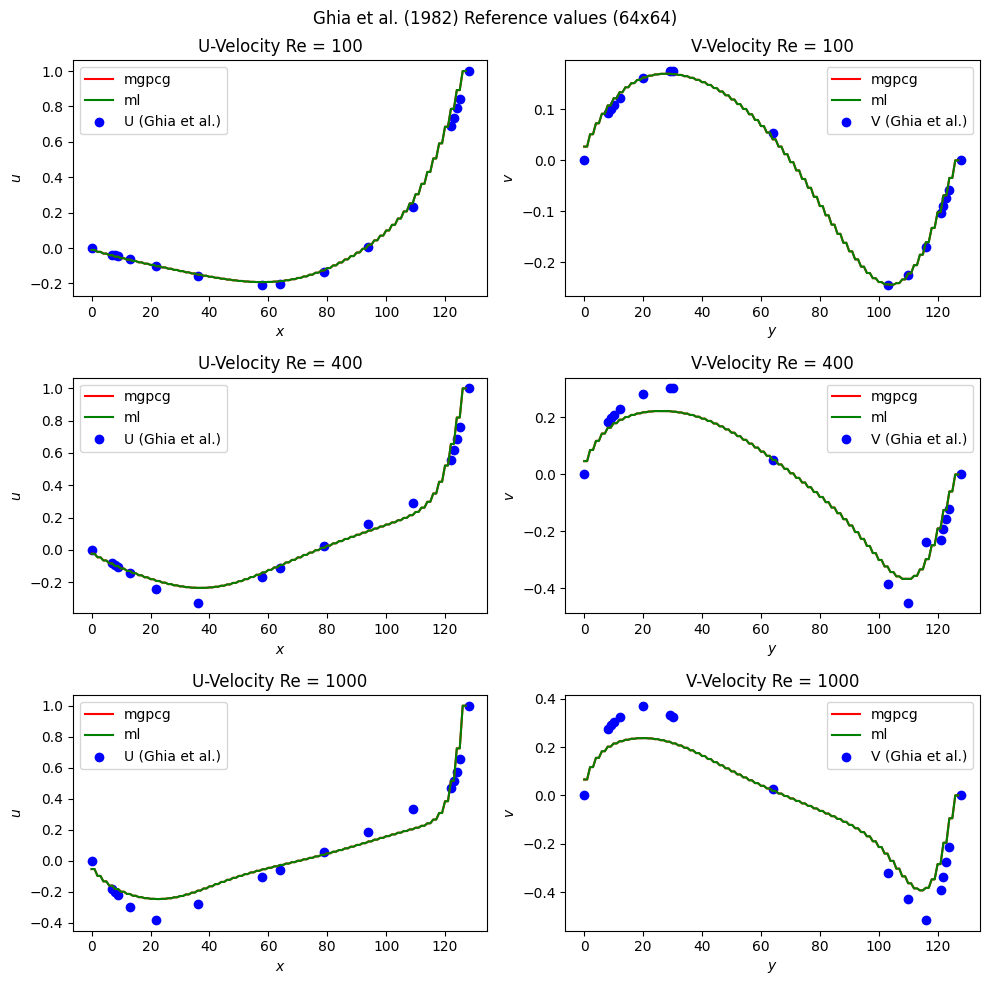

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Function to load data from a file
def load_data(solver, velocity, re, grid_size):
    file_path = f"{re}/{grid_size}x{grid_size}/lid_driven_cavity_2d/{solver}/{velocity}.dat"
    data = np.loadtxt(file_path)
    data = data[1:-1, 1:-1]

    if grid_size == 64:
        # Scale the data to match the scale of 128x128
        scale_factor = 2
        data = np.kron(data, np.ones((scale_factor, scale_factor)))

    if grid_size == 32:
        # Scale the data to match the scale of 128x128
        scale_factor = 4
        data = np.kron(data, np.ones((scale_factor, scale_factor)))

    if grid_size == 16:
        # Scale the data to match the scale of 128x128
        scale_factor = 8
        data = np.kron(data, np.ones((scale_factor, scale_factor)))

    if grid_size == 256:
        # Scale the data from 256x256 to match the scale of 128x128
        data = data[::2, ::2]

    if velocity == 'v':
        data = data[int(data.shape[0]/2), :]
    else:
        data = data[:, int(data.shape[1]/2)]

    return data

# Solver names
colors = ['red', 'green', 'blue', 'orange']

# Reference velocity data
reference_data = {
    100: {'u': reference_ux_RE_100, 'v': reference_uy_RE_100},
    400: {'u': reference_ux_RE_400, 'v': reference_uy_RE_400},
    1000: {'u': reference_ux_RE_1000, 'v': reference_uy_RE_1000}
}

# Grid sizes
grid_sizes = [16, 32, 64]
Re = [100, 400, 1000]

for grid_size in grid_sizes:
    # Create subplots
    fig, ax = plt.subplots(3, 2, figsize=(10, 10))

    # Title for whole figure
    fig.suptitle(f'Ghia et al. (1982) Reference values ({grid_size}x{grid_size})')

    # Plot for each solver
    for row, re in enumerate(REs):
        for col, velocity in enumerate(['u', 'v']):
            for solver in solvers:
                data = load_data(solver, velocity, re, grid_size)
                ax[row, col].plot(data, label=solver, color=colors[solvers.index(solver)])

            # Plot reference data
            reference_data_values = reference_data[re][f'{velocity}']
            ax[row, col].scatter(reference_data_values.keys(), reference_data_values.values(), label=f"{velocity.capitalize()} (Ghia et al.)", color="blue")

            # Set labels and legends
            ax[row, col].set_xlabel('$x$' if col == 0 else '$y$')
            ax[row, col].set_ylabel(f'${velocity}$')
            ax[row, col].legend()

            # Set title for top row
            ax[row, col].set_title(f'{velocity.capitalize()}-Velocity Re = {re}')

    plt.tight_layout()
    plt.show()


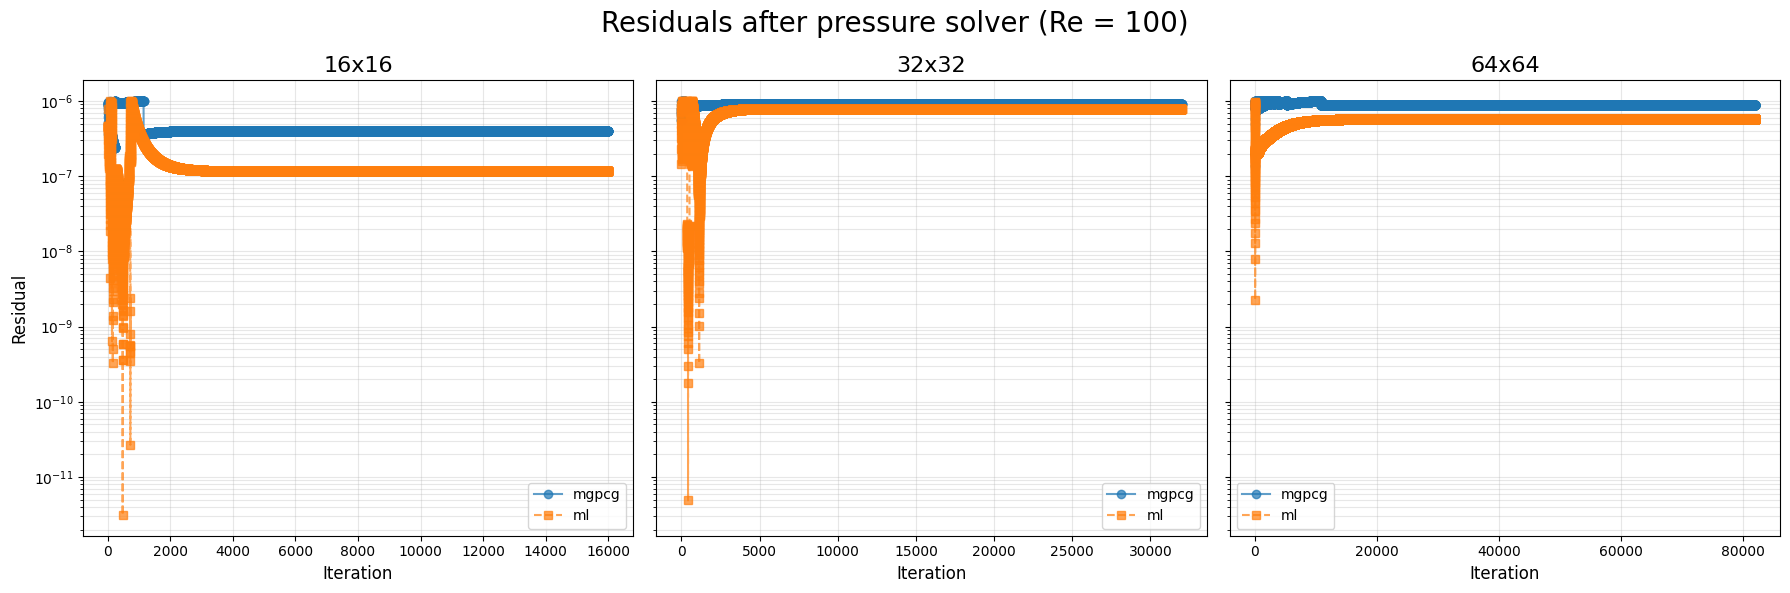

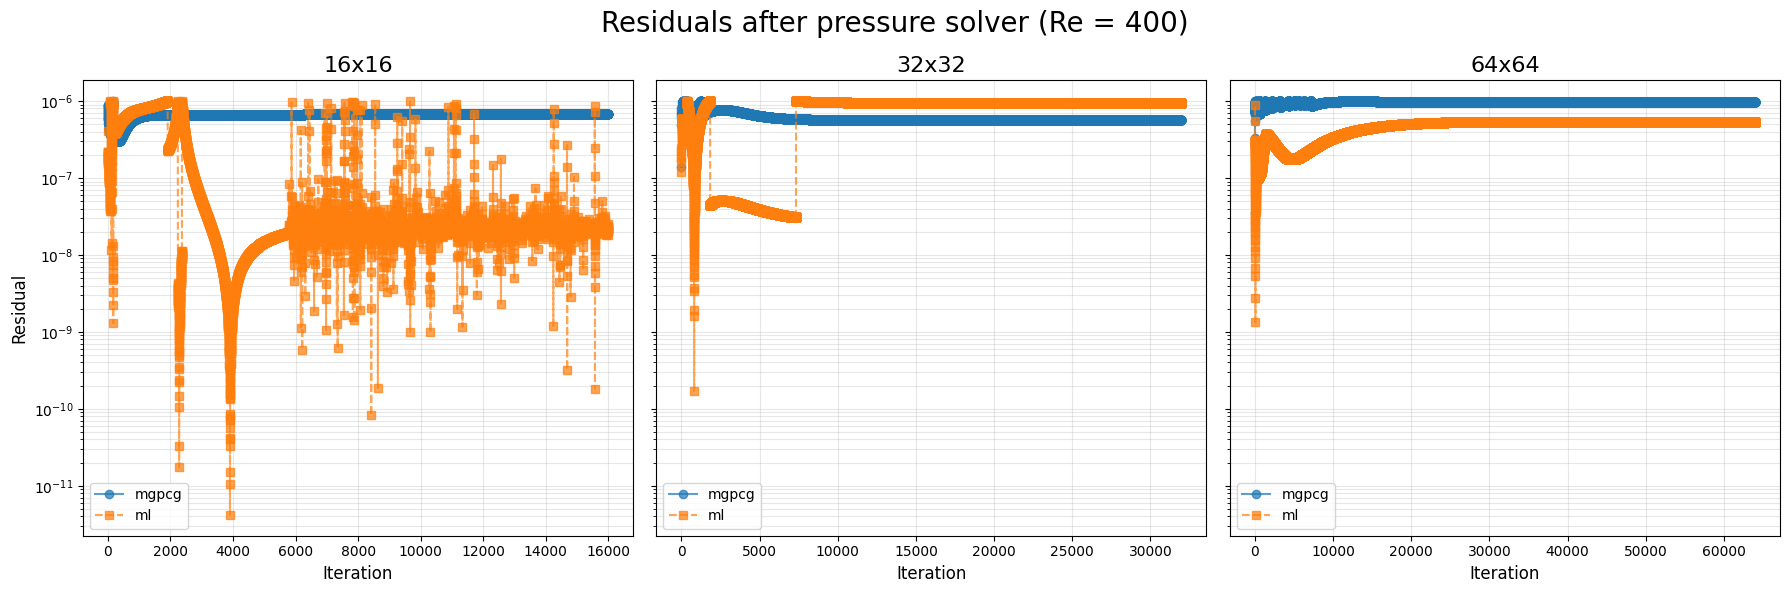

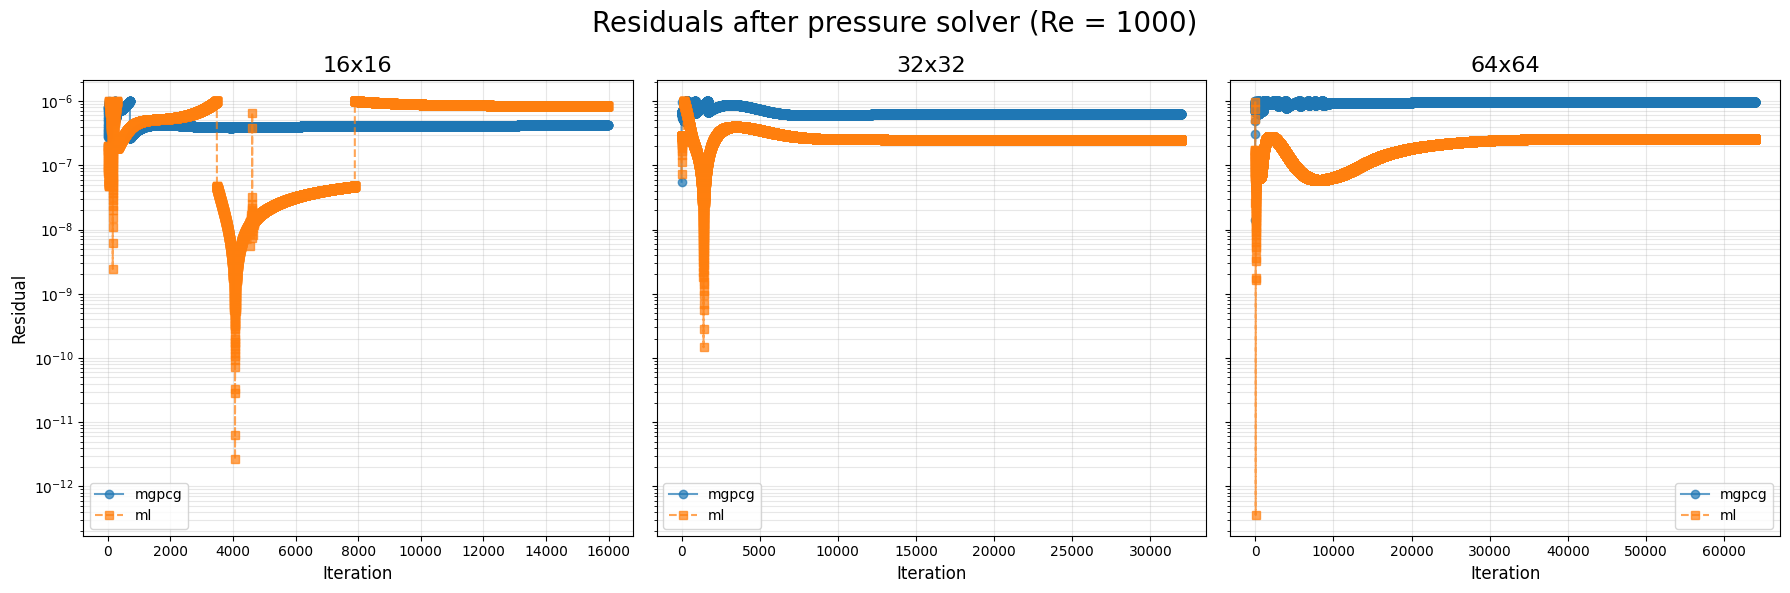

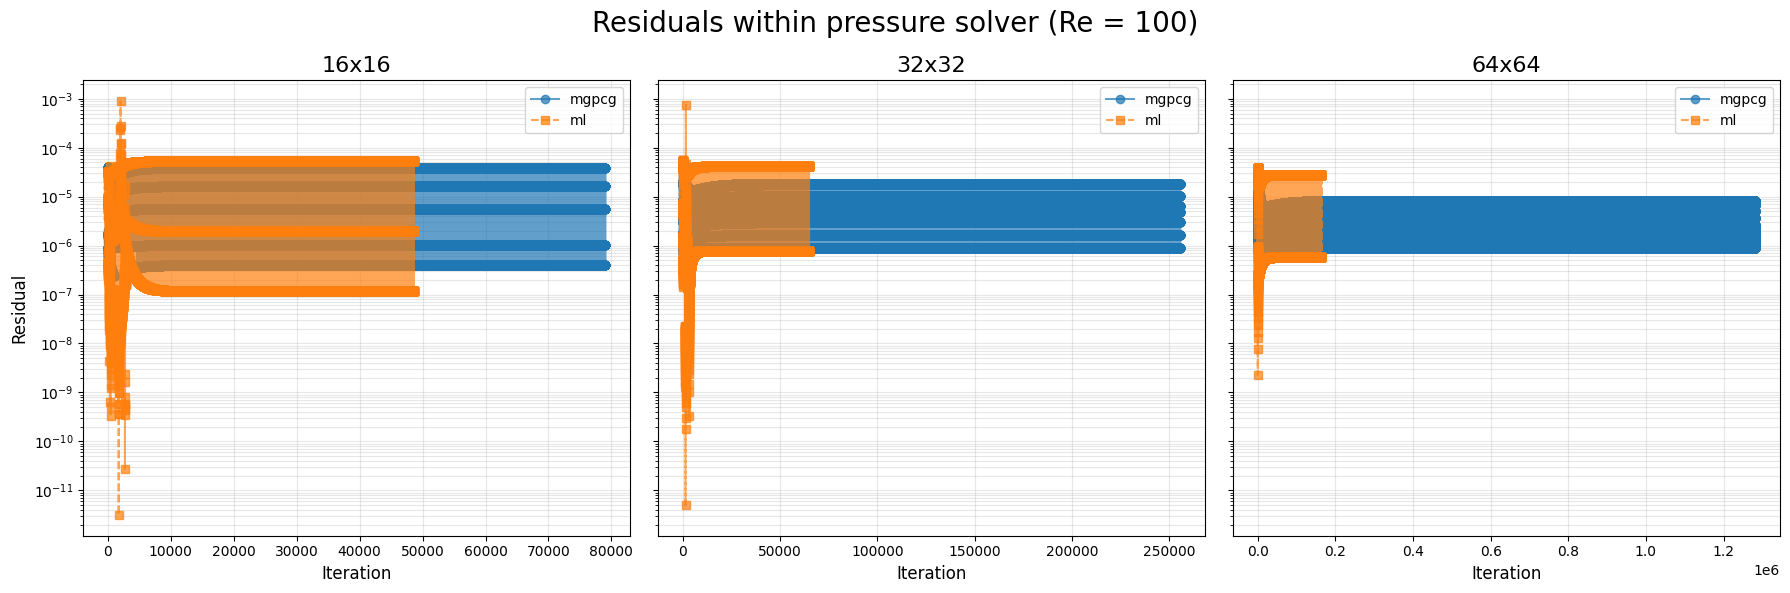

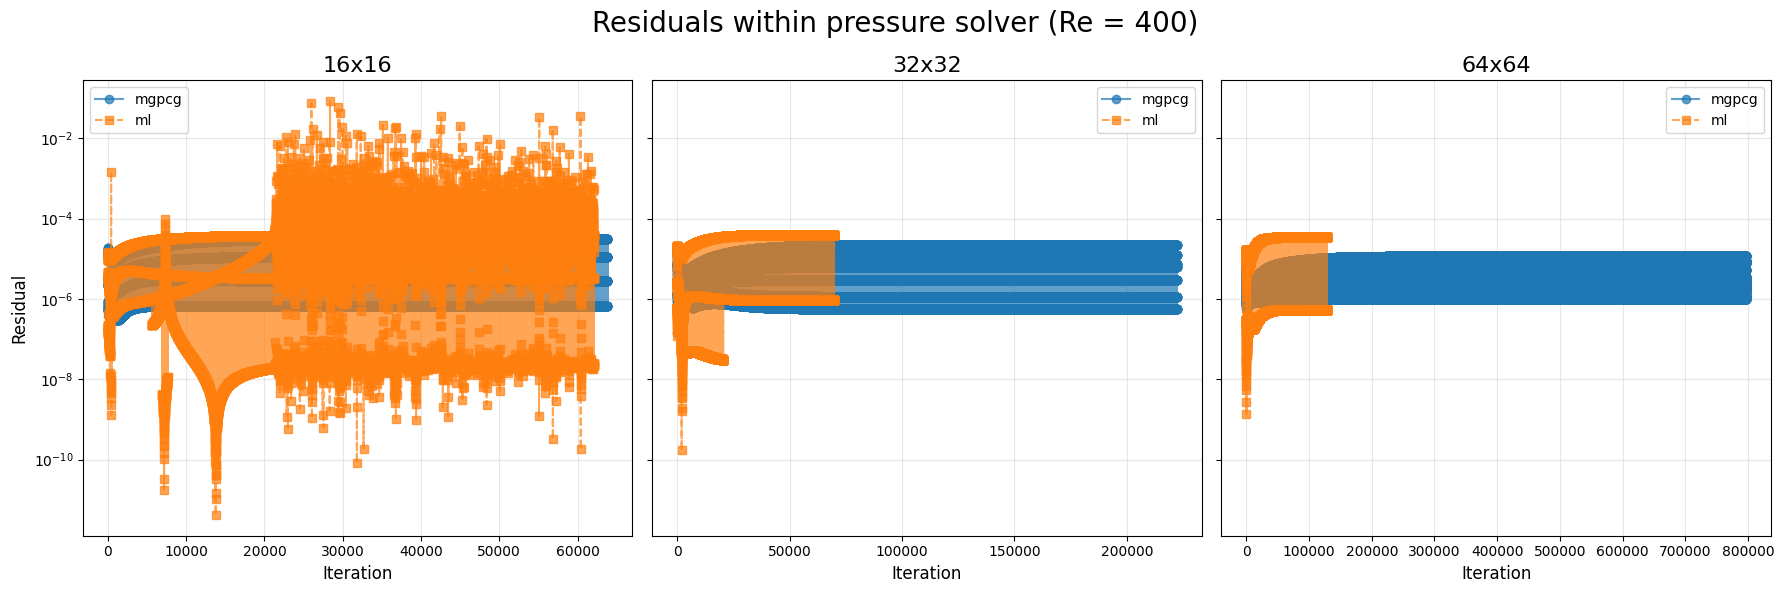

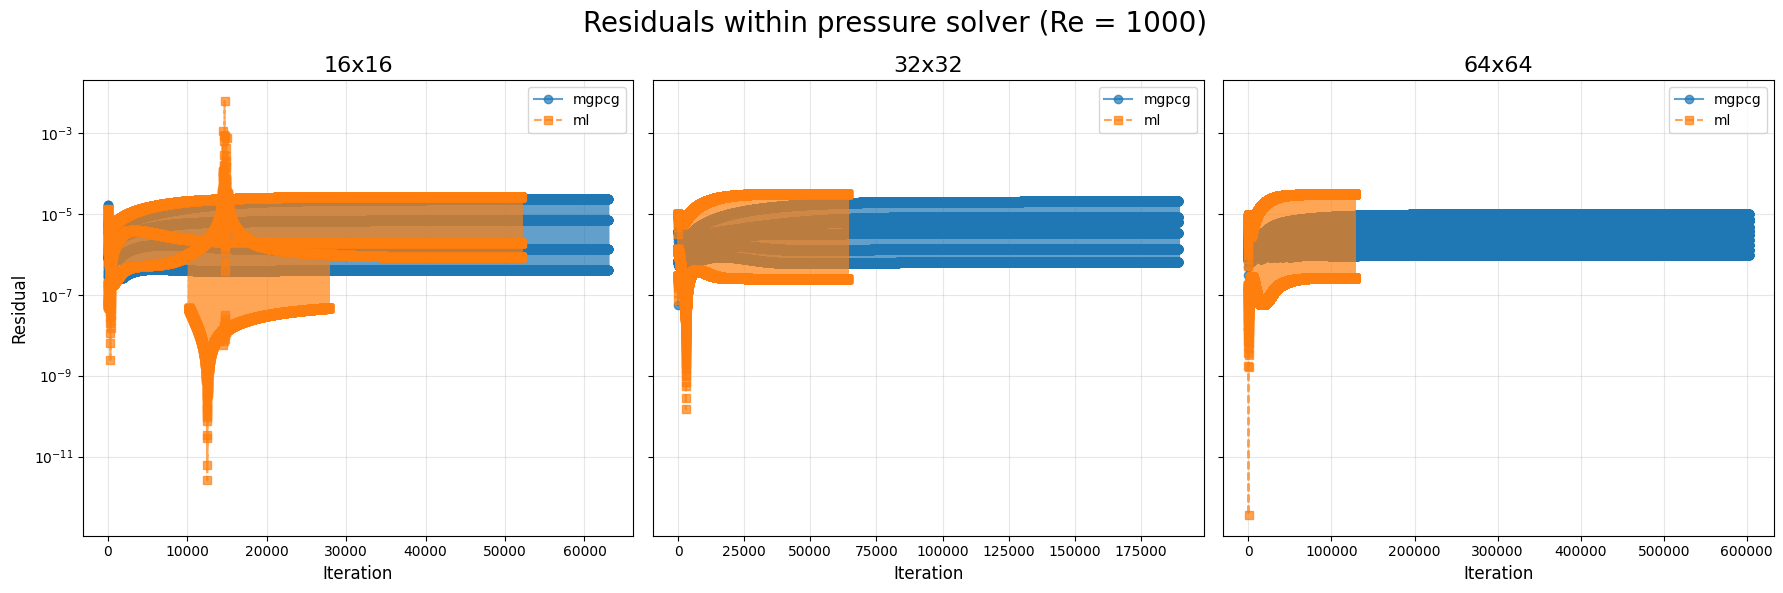

In [59]:
import numpy as np
import matplotlib.pyplot as plt

line_styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'D']

# Create a cycle of distinct colors
colors = ['#1f77b4', '#ff7f0e', '#90ee90', '#d62728']

residuals = ['residuals_without_pressure_solver', 'residuals_with_pressure_solver']

# Define a function to calculate the moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

for residual in residuals:
    for RE in REs:
        fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 row, 3 columns

        if residual == 'residuals_without_pressure_solver':
            fig.suptitle(f'Residuals after pressure solver (Re = {RE})', fontsize=20)
        elif residual == 'residuals_with_pressure_solver':
            fig.suptitle(f'Residuals within pressure solver (Re = {RE})', fontsize=20)

        for i, (resolution, solvers_dict) in enumerate(benchmarks):
            for problem_name, solvers in solvers_dict.items():
                ax = axs[i]

                for j, solver in enumerate(solvers):
                    data = np.loadtxt(f"{RE}/{resolution}/{problem_name}/{solver}/{residual}.dat", ndmin=1)

                    non_zero_indexes = np.nonzero(data)
                    selected_data = data[non_zero_indexes]

                    # Calculate moving average with window size 10 (adjust as needed)
                    window_size = 10
                    moving_avg = moving_average(selected_data, window_size)

                    ax.plot(
                        np.arange(len(selected_data)),
                        selected_data,
                        label=f'{solver}',
                        linestyle=line_styles[j % len(line_styles)],
                        color=colors[j % len(colors)],
                        marker=markers[j % len(markers)],
                        markersize=6,
                        alpha=0.7,
                    )

                ax.set_title(f"{resolution}", fontsize=16)
                ax.set_xlabel("Iteration", fontsize=12)
                ax.grid(True, which="both", ls="-", alpha=0.3)
                ax.legend()
                ax.set_yscale('log')

        axs[0].set_ylabel("Residual", fontsize=12)
        plt.tight_layout()
        plt.show()


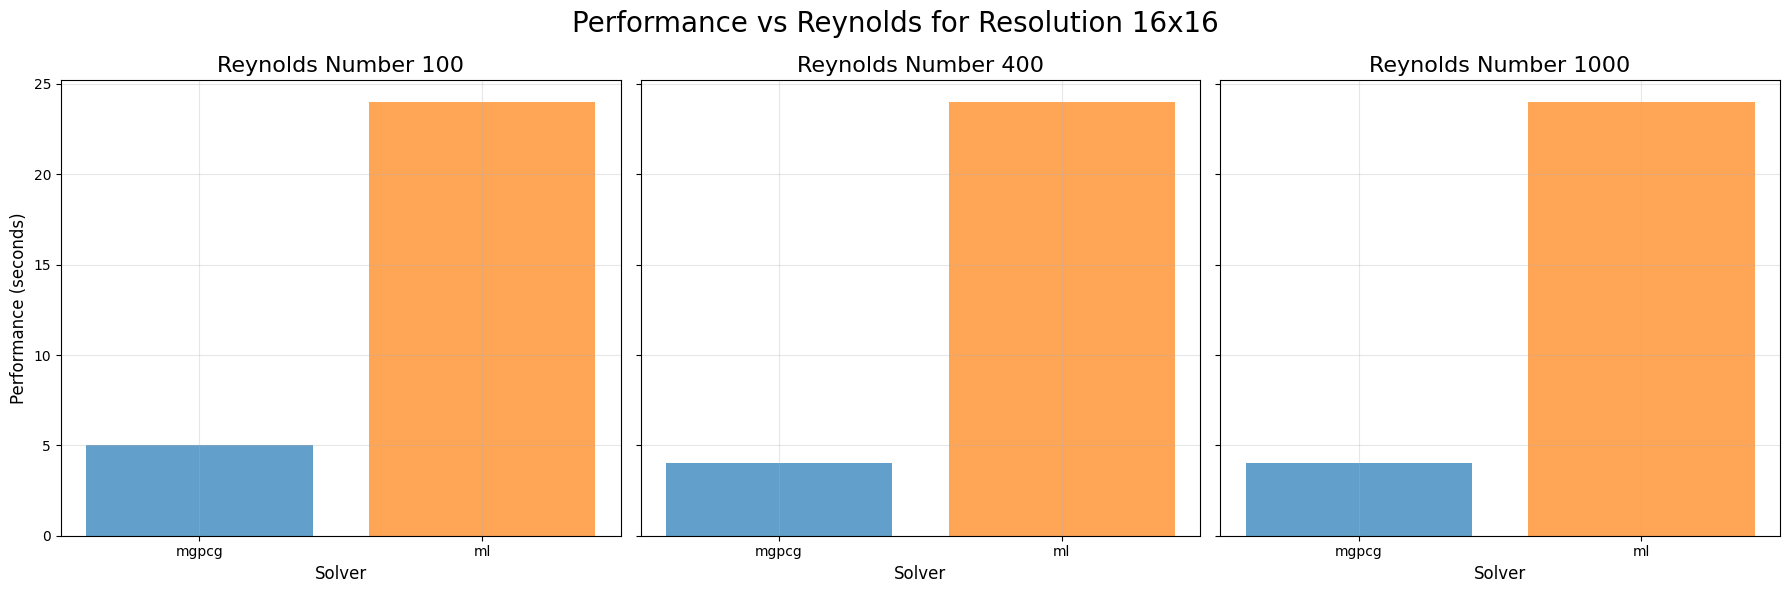

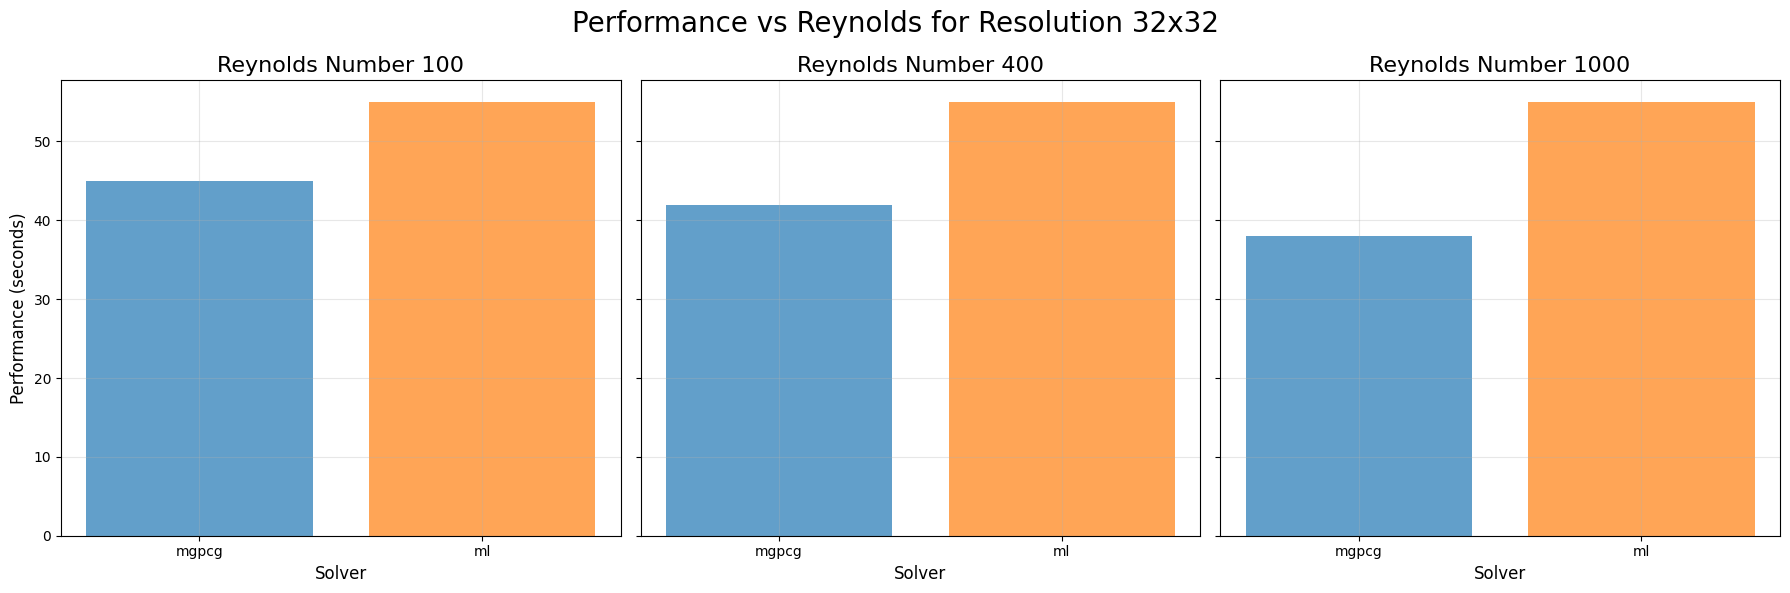

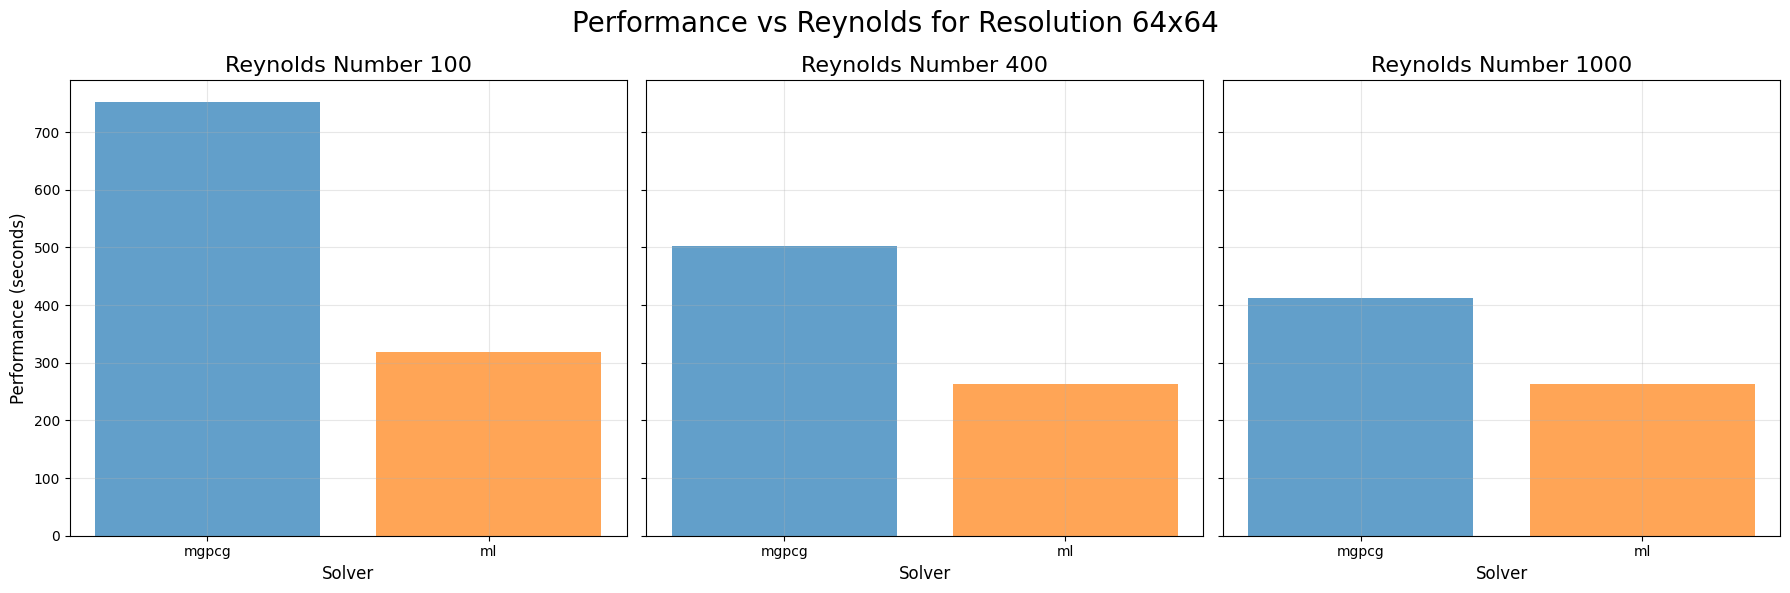

In [60]:
import numpy as np
import matplotlib.pyplot as plt

line_styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'D']

# Create a cycle of distinct colors
colors = ['#1f77b4', '#ff7f0e', '#90ee90', '#d62728']

for resolution, solvers_dict in benchmarks:
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 row, 3 columns

    residual = "residuals_over_time"
    fig.suptitle(f'Performance vs Reynolds for Resolution {resolution}', fontsize=20)

    for i, RE in enumerate(REs):
        ax = axs[i]

        for problem_name, solvers in solvers_dict.items():

            for j, solver in enumerate(solvers):
                data = np.loadtxt(f"{RE}/{resolution}/{problem_name}/{solver}/{residual}.dat", ndmin=1)

                seconds = np.nonzero(data)
                last_second = seconds[0][-1]

                ax.bar(
                    j,
                    last_second,
                    label=f'RE={RE}, {solver}',
                    color=colors[j % len(colors)],
                    alpha=0.7,
                )

        ax.set_title(f"Reynolds Number {RE}", fontsize=16)
        ax.set_xlabel("Solver", fontsize=12)
        ax.grid(True, which="both", ls="-", alpha=0.3)
        ax.set_xticks(np.arange(len(solvers) * len(solvers_dict)))
        ax.set_xticklabels(solvers)

    axs[0].set_ylabel("Performance (seconds)", fontsize=12)
    plt.tight_layout()
    plt.show()


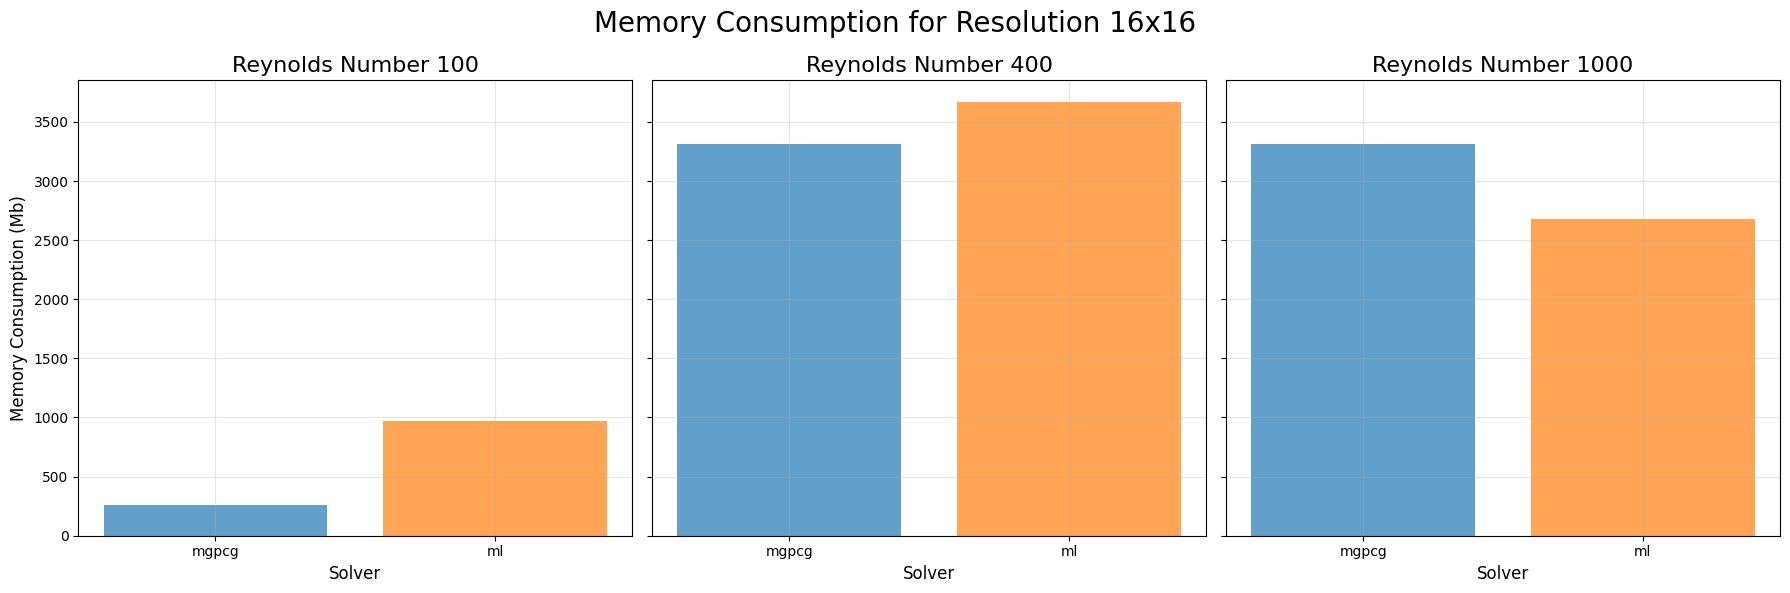

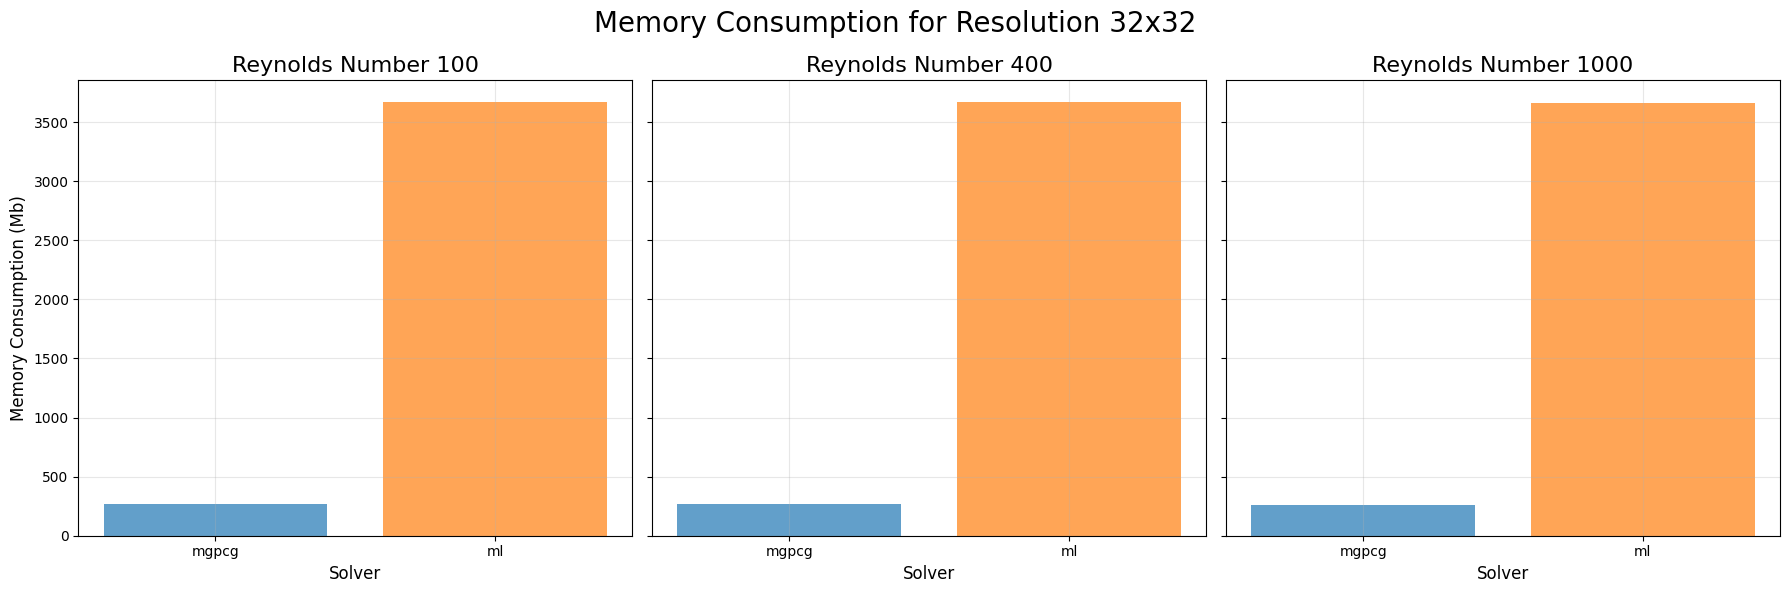

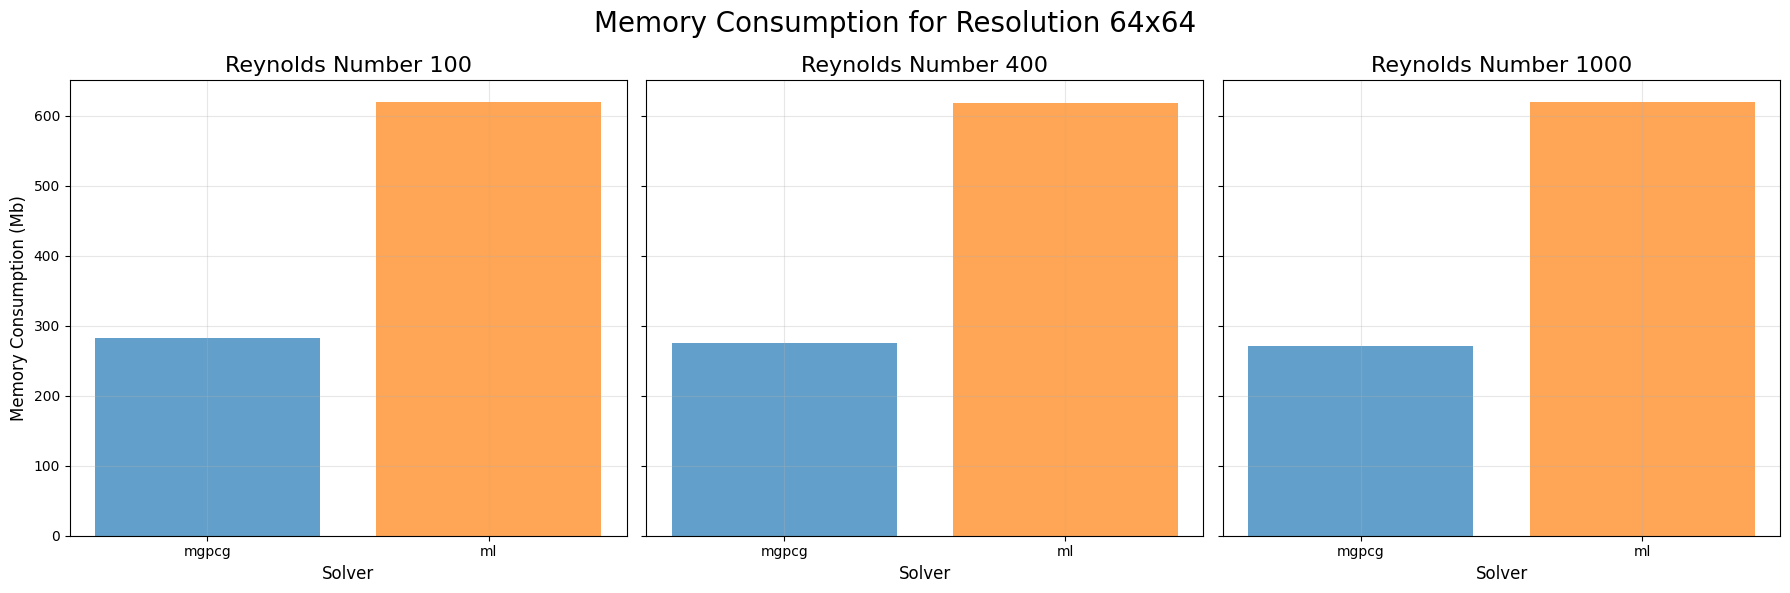

In [61]:
import numpy as np
import matplotlib.pyplot as plt

line_styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'D']

# Create a cycle of distinct colors
colors = ['#1f77b4', '#ff7f0e', '#90ee90', '#d62728']

for resolution, solvers_dict in benchmarks:
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 row, 3 columns

    residual = "residuals_over_time"
    fig.suptitle(f'Memory Consumption for Resolution {resolution}', fontsize=20)

    for i, RE in enumerate(REs):
        ax = axs[i]

        for problem_name, solvers in solvers_dict.items():

            for j, solver in enumerate(solvers):
                with open(f"{RE}/{resolution}/{problem_name}/{solver}/stats.csv") as f:
                    reader = csv.DictReader(f)
                    row = next(reader)
                    mem = float(row['Memory Consumed']) / 1024

                ax.bar(
                    j,
                    mem,
                    label=f'RE={RE}, {solver}',
                    color=colors[j % len(colors)],
                    alpha=0.7,
                )

        ax.set_title(f"Reynolds Number {RE}", fontsize=16)
        ax.set_xlabel("Solver", fontsize=12)
        ax.grid(True, which="both", ls="-", alpha=0.3)
        ax.set_xticks(np.arange(len(solvers) * len(solvers_dict)))
        ax.set_xticklabels(solvers)

    axs[0].set_ylabel("Memory Consumption (Mb)", fontsize=12)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_16425/2330151945.py:56: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


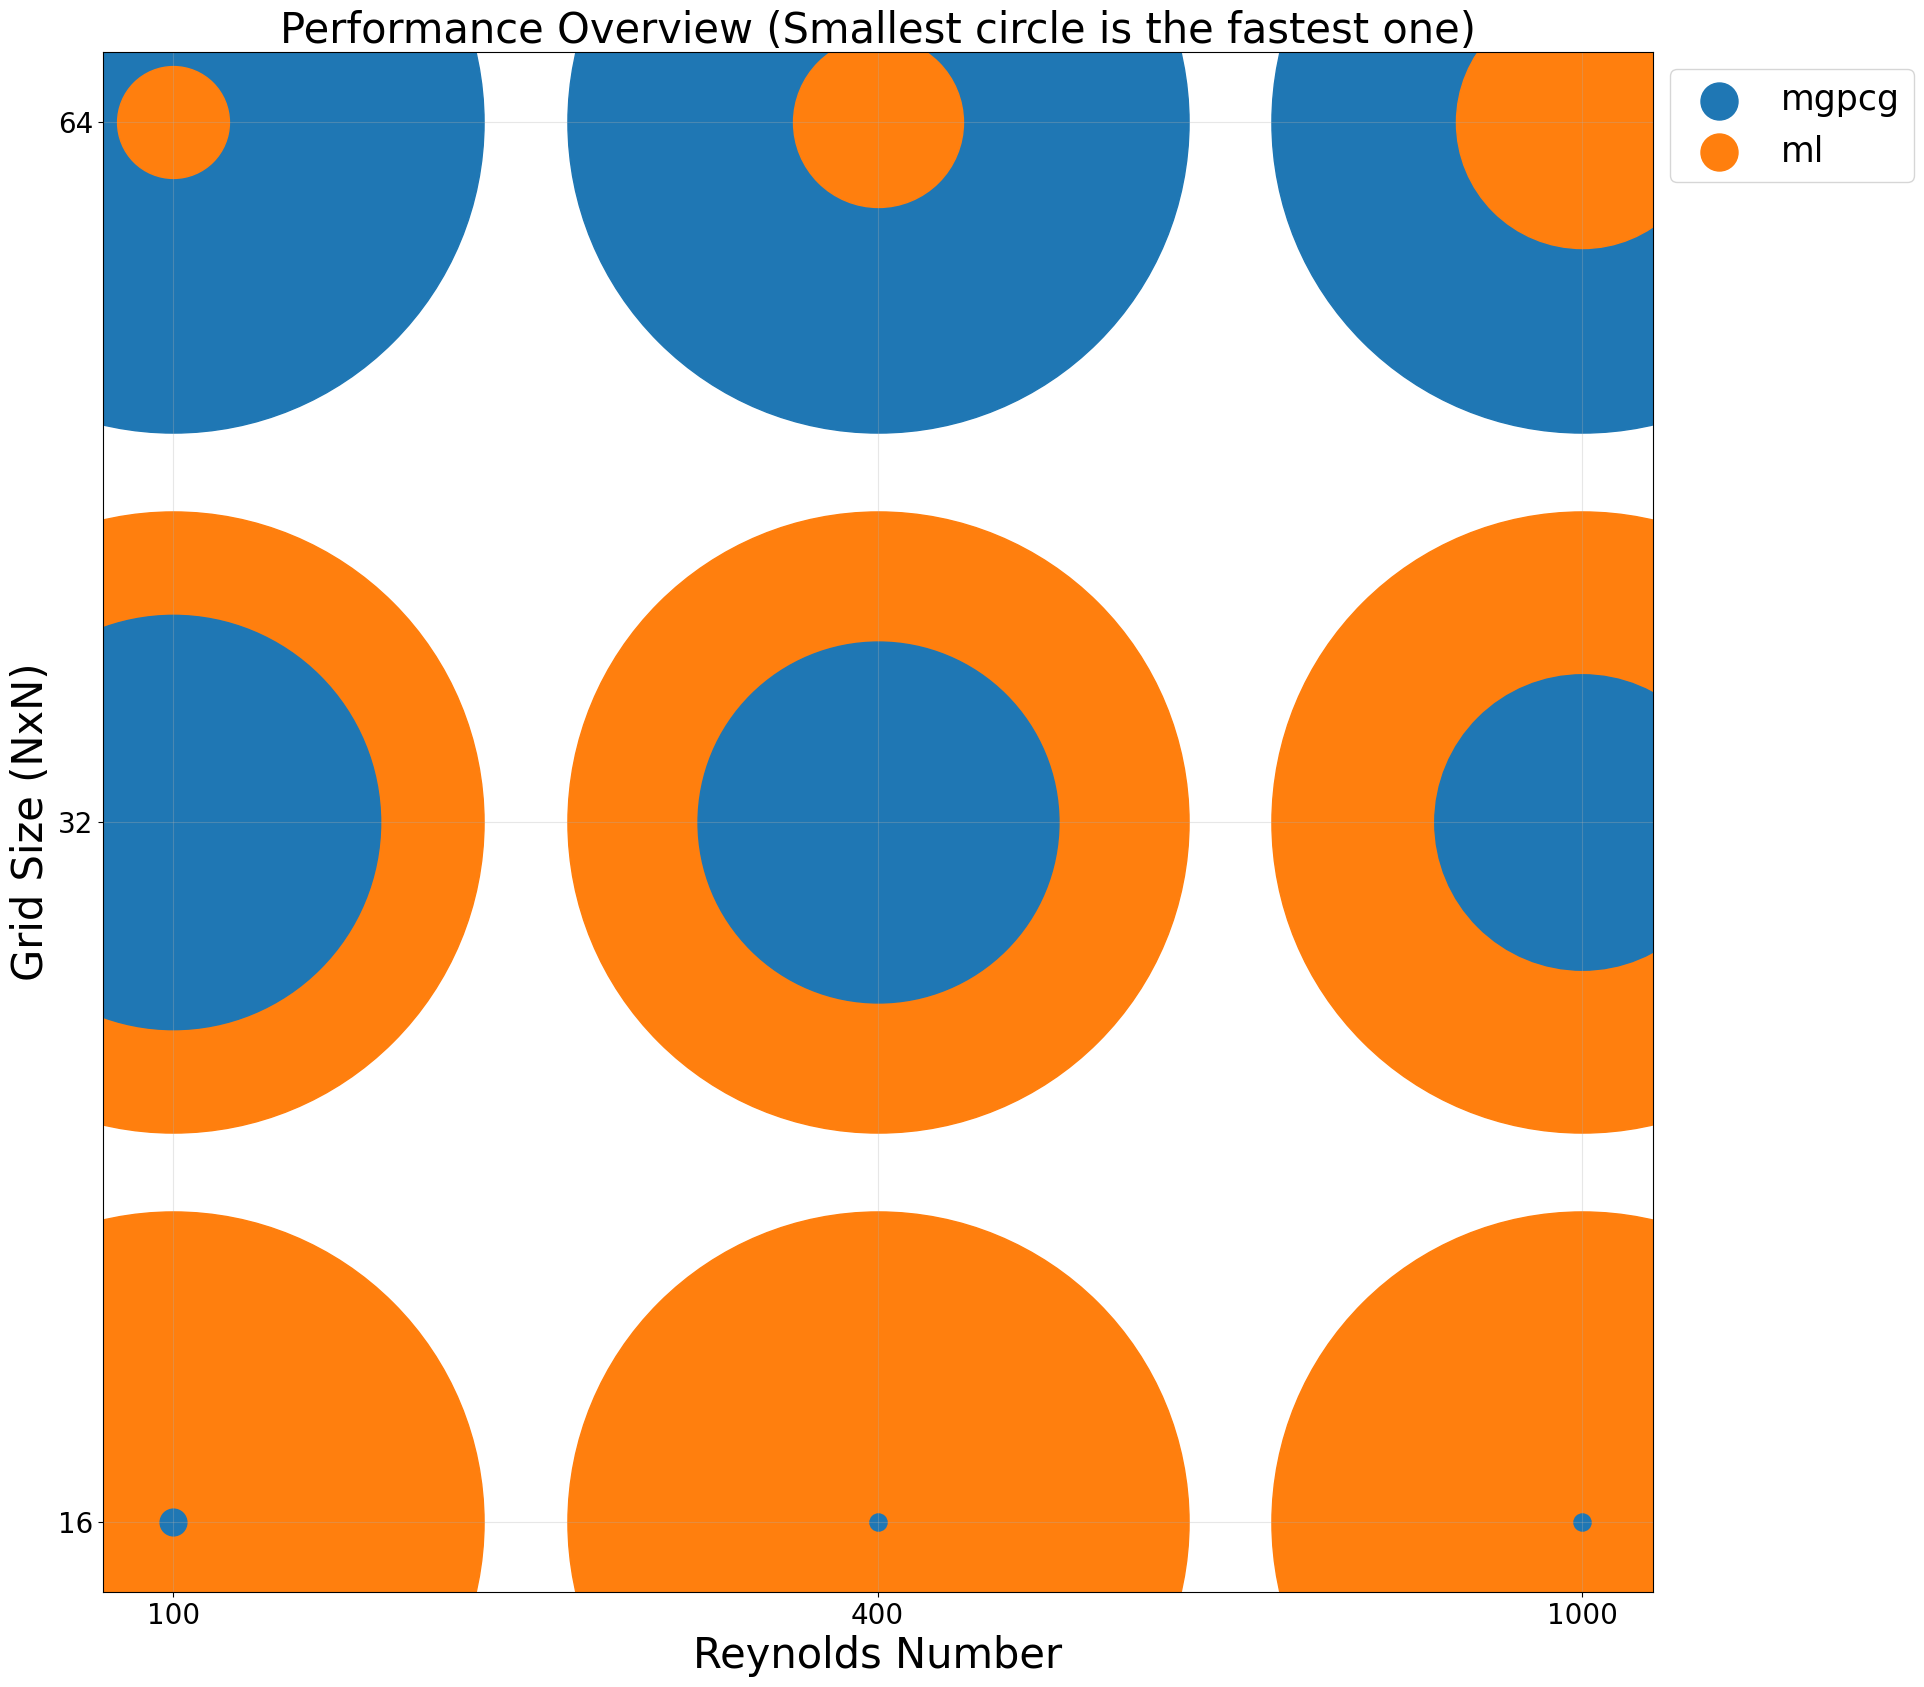

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Create a cycle of distinct colors
fig, ax = plt.subplots(figsize=(20, 20))

# List to store scatter information for sorting
relative_factors = {}
scatter_info_list = []
legend_handles = {}

for resolution, solvers_dict in benchmarks:
    for RE in REs:
        max_duration = 0
        for j, solver in enumerate(solvers_dict['lid_driven_cavity_2d']):
            data = np.loadtxt(f"{RE}/{resolution}/lid_driven_cavity_2d/{solver}/residuals_over_time.dat", ndmin=1)
            seconds = np.nonzero(data)
            last_second = seconds[0][-1] + j * 0.1
            max_duration = max(max_duration, last_second)

        for j, solver in enumerate(solvers_dict['lid_driven_cavity_2d']):
            data = np.loadtxt(f"{RE}/{resolution}/lid_driven_cavity_2d/{solver}/residuals_over_time.dat", ndmin=1)
            seconds = np.nonzero(data)
            last_second = seconds[0][-1] + j * 0.1
            relative_factor = last_second / max_duration
            relative_factors[(resolution, RE, solver)] = relative_factor

            # Calculate circle_size
            circle_size = 200000 * (relative_factor ** 4)

            # Add information to the list for sorting
            scatter_info_list.append((resolution, RE, solver, circle_size, j))

# Sort the list based on circle_size in descending order
scatter_info_list.sort(key=lambda x: x[3], reverse=True)

# Plot circles based on the sorted list with switched x and y
for scatter_info in scatter_info_list:
    resolution, RE, solver, circle_size, j = scatter_info
    scatter = ax.scatter(str(RE), str(resolution.split('x')[0]), s=circle_size, color=solvers_colors[solver],
               edgecolors=solvers_colors[solver], marker='o', label=solver)
    if solver not in legend_handles:
        legend_handles[solver] = scatter

ax.set_title('Performance Overview (Smallest circle is the fastest one)', fontsize=30)
ax.set_xlabel('Reynolds Number', fontsize=30)
ax.set_ylabel('Grid Size (NxN)', fontsize=30)
ax.tick_params(axis='both', labelsize=20)
ax.grid(True, which="both", ls="-", alpha=0.3)
ax.set_xticks(ax_xticks)
ax.set_yticks(ax_yticks)

# Create a legend
legend_handles_sorted = [legend_handles[solver] for solver in legend_labels_sorted]
legend = ax.legend(handles=legend_handles_sorted, labels=legend_labels_sorted, loc='upper left', bbox_to_anchor=(1, 1), fontsize=25)
for handle in legend.legendHandles:
    handle._sizes = [710]  # Adjust the size of the legend point

plt.show()


/tmp/ipykernel_16425/3676291418.py:57: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


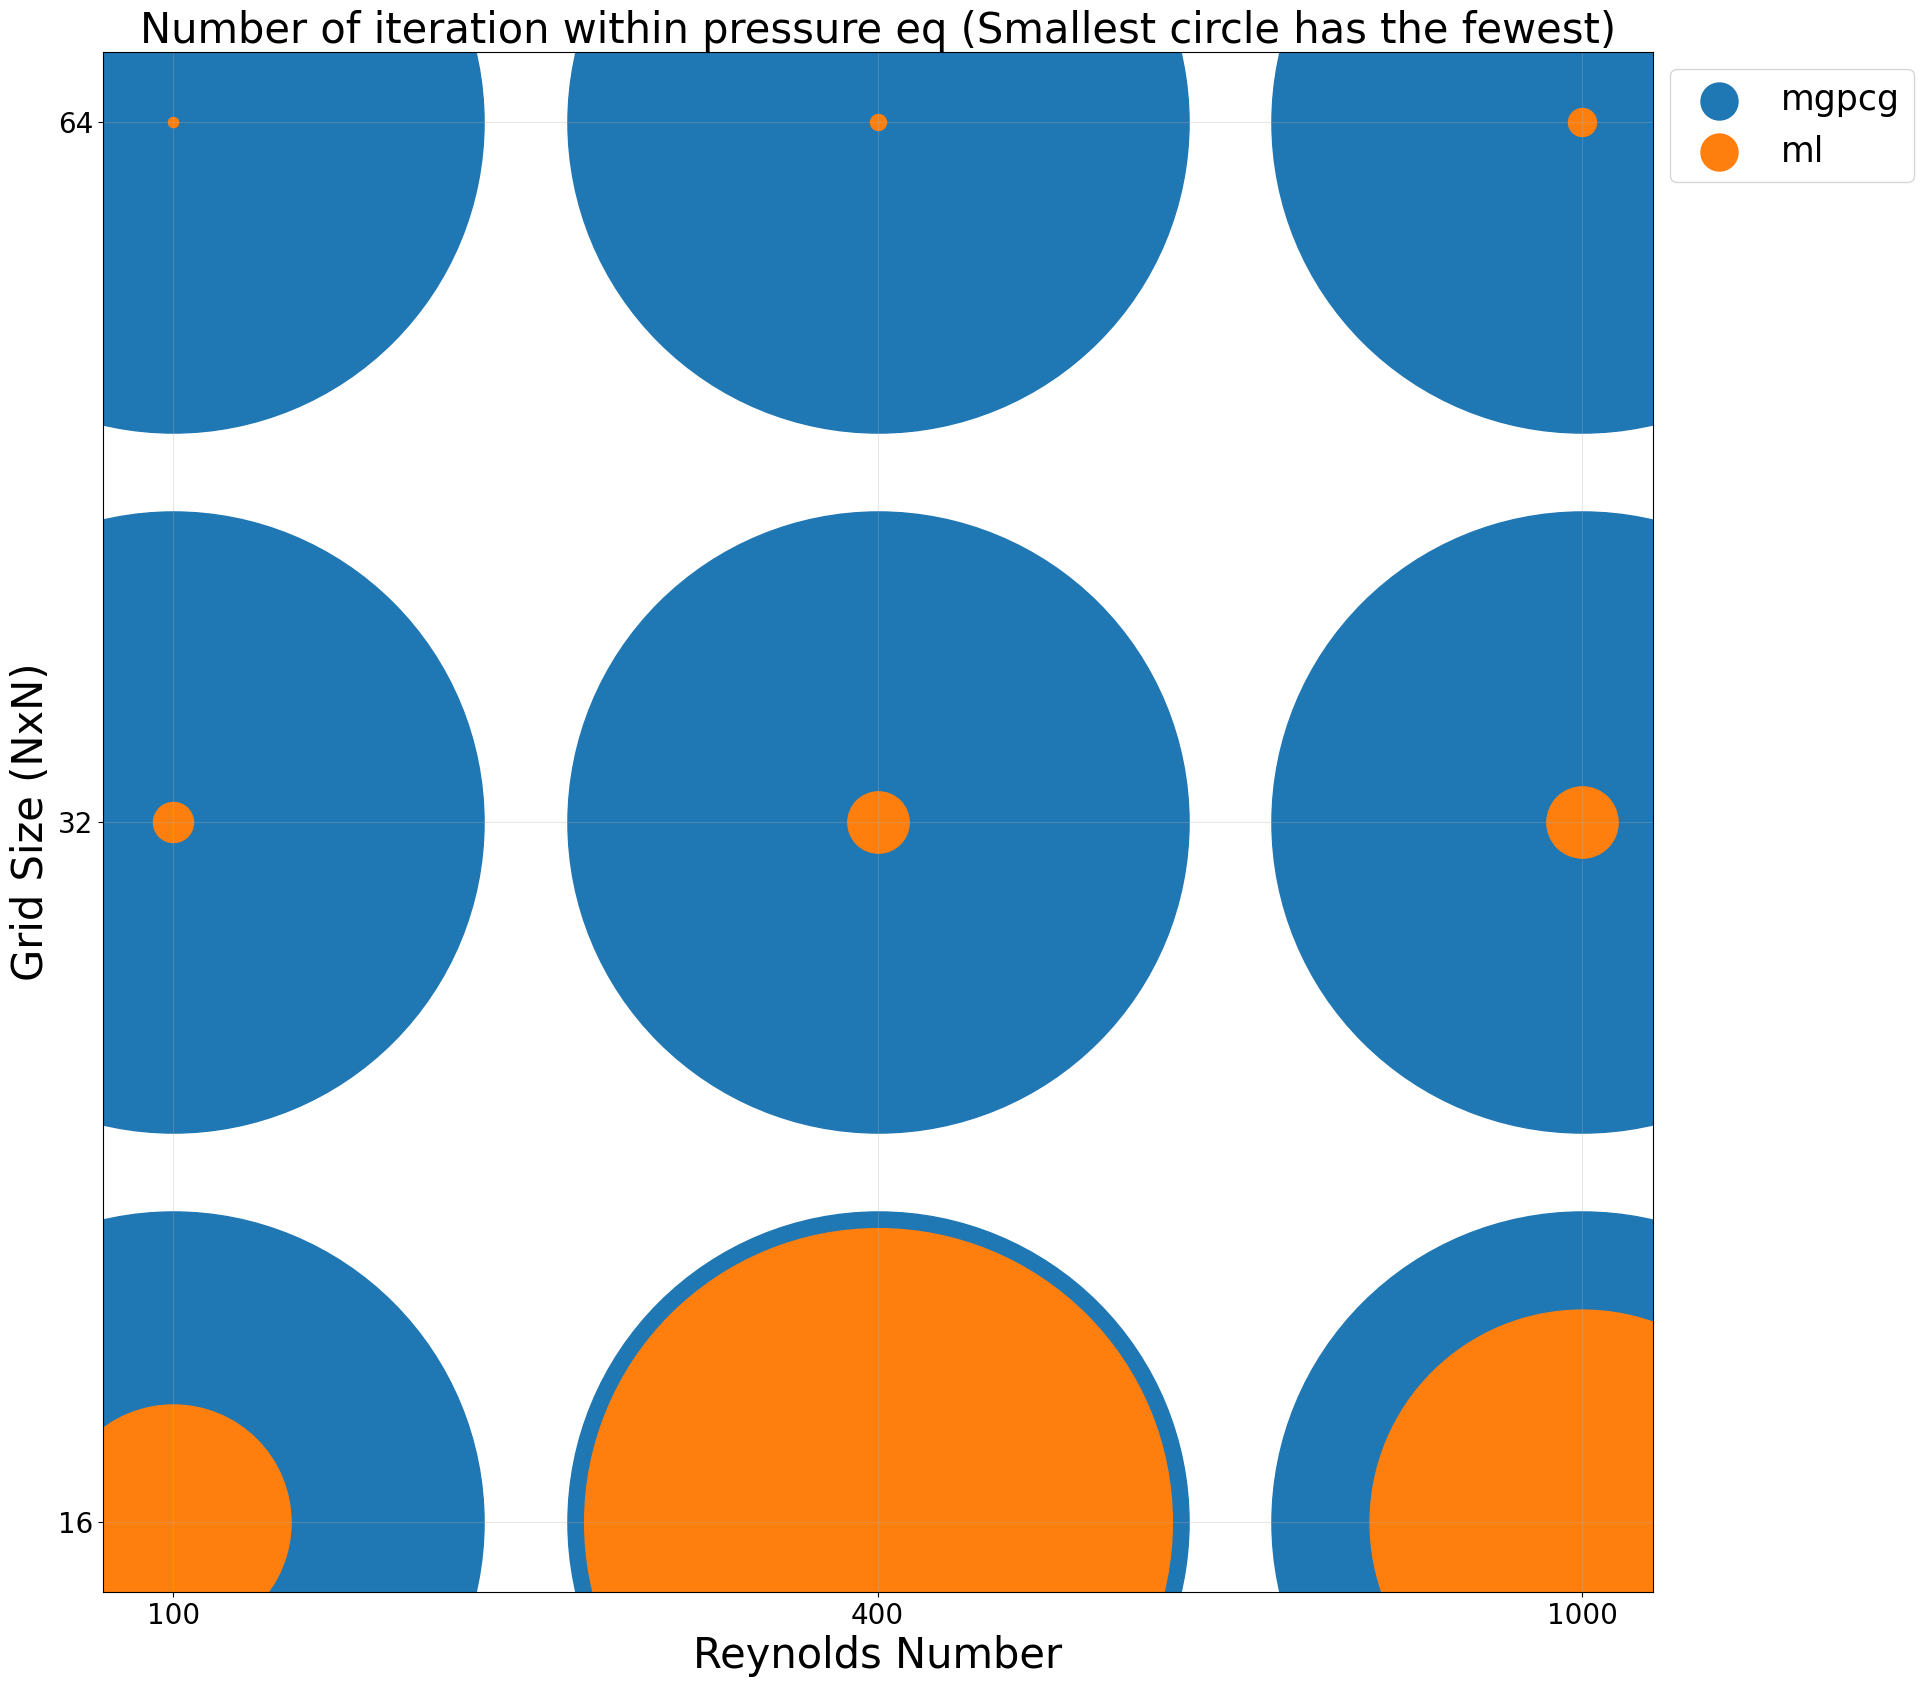

In [63]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))

# List to store scatter information for sorting
relative_factors = {}
scatter_info_list = []
legend_handles = {}

for resolution, solvers_dict in benchmarks:
    for RE in REs:
        max_index = 0
        for j, solver in enumerate(solvers_dict['lid_driven_cavity_2d']):
            data = np.loadtxt(f"{RE}/{resolution}/lid_driven_cavity_2d/{solver}/residuals_with_pressure_solver.dat", ndmin=1)
            data = data[data > 0]
            indexes = len(data)
            last_index = indexes + j * 0.1
            max_index = max(max_index, last_index)

        for j, solver in enumerate(solvers_dict['lid_driven_cavity_2d']):
            data = np.loadtxt(f"{RE}/{resolution}/lid_driven_cavity_2d/{solver}/residuals_with_pressure_solver.dat", ndmin=1)
            data = data[data > 0]
            indexes = len(data)
            last_index = indexes + j * 0.1
            relative_factor = last_index / max_index
            relative_factors[(resolution, RE, solver)] = relative_factor

            # Calculate circle_size
            circle_size = 200000 * (relative_factor ** 4)

            # Add information to the list for sorting
            scatter_info_list.append((resolution, RE, solver, circle_size, j))

# Sort the list based on circle_size in descending order
scatter_info_list.sort(key=lambda x: x[3], reverse=True)

# Plot circles based on the sorted list with switched x and y
for scatter_info in scatter_info_list:
    resolution, RE, solver, circle_size, j = scatter_info
    scatter = ax.scatter(str(RE), str(resolution.split('x')[0]), s=circle_size, color=solvers_colors[solver],
               edgecolors=solvers_colors[solver], marker='o', label=solver)
    if solver not in legend_handles:
        legend_handles[solver] = scatter

ax.set_title('Number of iteration within pressure eq (Smallest circle has the fewest)', fontsize=30)
ax.set_xlabel('Reynolds Number', fontsize=30)
ax.set_ylabel('Grid Size (NxN)', fontsize=30)
ax.tick_params(axis='both', labelsize=20)
ax.grid(True, which="both", ls="-", alpha=0.3)
ax.set_xticks(ax_xticks)
ax.set_yticks(ax_yticks)

# Create a legend
legend_handles_sorted = [legend_handles[solver] for solver in legend_labels_sorted]
legend = ax.legend(handles=legend_handles_sorted, labels=legend_labels_sorted, loc='upper left', bbox_to_anchor=(1, 1), fontsize=25)
for handle in legend.legendHandles:
    handle._sizes = [710]  # Adjust the size of the legend point

plt.show()
